# Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\PC\Downloads\MM-2023 Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))
df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

# Step 2

In [5]:
# Dropping First Name column due to PII concerns
df = df.drop('First Name', axis=1)

In [6]:
# Dropping Surname column due to PII concerns
df = df.drop('Surname', axis=1)

# Step 3

In [7]:
# Checking state value counts
df['State'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [8]:
# Defining regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating new column with region values

df.loc[df['State'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['State'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['State'].isin(South), 'region'] = 'South'
df.loc[df['State'].isin(West), 'region'] = 'West'

In [10]:
# Checking region value counts
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
# Creating crosstab of spending_flag and region
crosstab = pd.crosstab (df['spending_flag'], df['region'], dropna = False)

In [12]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


# Step 4

In [13]:
# Creating activity flag
df.loc[df['max_order'] <5, 'activity_flag'] = 'Inactive User'
df.loc[df['max_order'] >=5, 'activity_flag'] = 'Active User'

In [14]:
# Checking region value counts
df['activity_flag'].value_counts(dropna = False)

Active User      30964564
Inactive User     1440295
Name: activity_flag, dtype: int64

In [15]:
# Creating a subset with only the active users
df_active =  df[df['activity_flag']=='Active User']

In [16]:
# Exporting active user only dataframe
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_active.pkl'))

# Step 5

#### I am going to divide people as follows:

### Age:
30 and below = Young

Between 31 and 59 = Middle aged

60 and above = Elderly


### Income:
50k or lower = Low income

Between 50k and 100k = Middling income

100k or higher = High income


### Household status:
No dependants = Childless

1 or 2 dependants = Few children

2 or more dependants = Many children

Divorced/widowed with children OR single without children = Single
Married without children = Couple
Divorced/widowed with children OR single with children = Single parent
Married with children OR living with parents and siblings  = Family


### Purchasing habits:
Has never purchased anything from the "meat seafood" or "dairy eggs" department = Vegan
Otherwise = Non-Vegan

Has never purchased anything from the "pets" department = No Pets
Otherwise = Has Pets

Has never purchased anything from the "babies" department = "Has Baby": No
Otherwise = "Has Baby": Yes

## Getting descriptive statistics for our factors

In [17]:
# Getting descriptive statistics for age
df_active['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [18]:
# Getting descriptive statistics for income
df_active['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [19]:
# Getting descriptive statistics for dependants
df_active['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [20]:
# Checking family status value counts
df_active['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

## Grouping

### Age

In [21]:
# Defining age groups
df_active.loc[df_active['Age'] <= 30, 'age_group'] = 'Young'
df_active.loc[(df_active['Age'] > 30) & (df_active['Age'] < 60), 'age_group'] = 'Middle aged'
df_active.loc[df_active['Age'] >= 60, 'age_group'] = 'Elderly'

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\2528662646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['Age'] <= 30, 'age_group'] = 'Young'


In [22]:
# Checking age_group value counts
df_active['age_group'].value_counts()

Middle aged    14085820
Elderly        10574504
Young           6304240
Name: age_group, dtype: int64

### Income

In [23]:
# Defining income groups
df_active.loc[df_active['income'] <= 50000, 'income_group'] = 'Low income'
df_active.loc[(df_active['income'] > 50000) & (df_active['income'] < 100000), 'income_group'] = 'Middling income'
df_active.loc[df_active['income'] >= 100000, 'income_group'] = 'High income'

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\2281676054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['income'] <= 50000, 'income_group'] = 'Low income'


In [24]:
# Checking income_group value counts
df_active['income_group'].value_counts()

High income        14207402
Middling income    13394608
Low income          3362554
Name: income_group, dtype: int64

### Household

In [25]:
# Defining dependant groups
df_active.loc[df_active['n_dependants'] == 0, 'dependant_group'] = 'Childless'
df_active.loc[(df_active['n_dependants'] == 1) | (df_active['n_dependants'] == 2), 'dependant_group'] = 'Few children'
df_active.loc[df_active['n_dependants'] >= 3, 'dependant_group'] = 'Many children'

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\2103556428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['n_dependants'] == 0, 'dependant_group'] = 'Childless'


In [26]:
# Checking dependant_group value counts
df_active['dependant_group'].value_counts()

Few children     15452367
Many children     7772516
Childless         7739681
Name: dependant_group, dtype: int64

In [27]:
# Defining household groups
df_active.loc[(df_active['fam_status'] == 'married') & (df_active['n_dependants'] == 0), 'household'] = 'Couple'
df_active.loc[(df_active['fam_status'] == 'married') & (df_active['n_dependants'] >= 1), 'household'] = 'Family'
df_active.loc[(df_active['fam_status'] == 'divorced/widowed') | (df_active['fam_status'] == 'single'), 'household'] = 'Single'
df_active.loc[(df_active['fam_status'] == 'divorced/widowed') & (df_active['n_dependants'] >= 1 ), 'household'] = 'Single Parent'
df_active.loc[df_active['fam_status'] == 'living with parents and siblings', 'household'] = 'Family'

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\2646967988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[(df_active['fam_status'] == 'married') & (df_active['n_dependants'] == 0), 'household'] = 'Couple'


In [28]:
# Checking household value counts
df_active['household'].value_counts()

Family    23224883
Single     7739681
Name: household, dtype: int64

### Purchasing habits

In [29]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
# Renaming index column
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [31]:
# Creating data dictionary
depts_dictionary=dict(zip(df_depts["department_id"], df_depts["department"]))

In [32]:
depts_dictionary

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [33]:
# Mapping dictionary to dataframe
df_active['department'] = df_active['department_id'].map(depts_dictionary)

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\999691873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['department'] = df_active['department_id'].map(depts_dictionary)


In [34]:
# Checking department value counts
df_active['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [35]:
# Creating a vegan flag
result = []
for value in df_active['department_id']:
    if value not in (12, 16):
        result.append('Vegan')
    else:
        result.append('Non-Vegan')

In [36]:
# Assigning result to vegan column
df_active['vegan'] = result

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\1965794938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['vegan'] = result


In [37]:
# Checking vegan value counts
df_active['vegan'].value_counts(dropna = False)

Vegan        25112601
Non-Vegan     5851963
Name: vegan, dtype: int64

In [38]:
# Creating pet_owner column
df_active.loc[df_active['department'] == 'pets', 'pet_owner'] = 'Has Pets'
df_active.loc[df_active['department'] != 'pets', 'pet_owner'] = 'No Pets'

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\3019977397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['department'] == 'pets', 'pet_owner'] = 'Has Pets'


In [39]:
# Checking pet_owner value counts
df_active['pet_owner'].value_counts(dropna = False)

No Pets     30871504
Has Pets       93060
Name: pet_owner, dtype: int64

In [40]:
# Creating has_baby column
df_active.loc[df_active['department'] == 'babies', 'has_baby'] = 'Yes'
df_active.loc[df_active['department'] != 'babies', 'has_baby'] = 'No'

C:\Users\PC\AppData\Local\Temp\ipykernel_18112\1403995369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['department'] == 'babies', 'has_baby'] = 'Yes'


In [41]:
# Checking has_baby value counts
df_active['has_baby'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: has_baby, dtype: int64

# Step 6

Text(0.5, 1.0, 'Customers by age group')

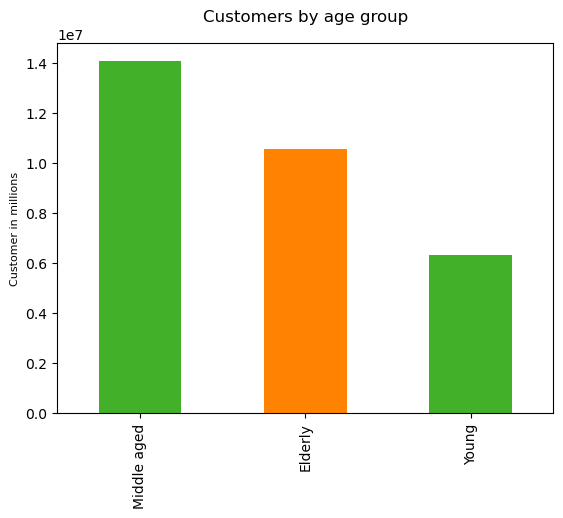

In [42]:
# Creating a bar chart for age_group
bar_age = df_active['age_group'].value_counts().plot.bar(color =['#43b02a', '#ff8200', '#43b02a'])
plt.ylabel('Customer in millions', fontsize = 8)
plt.title('Customers by age group', fontsize = 12, pad=16)

Text(0.5, 1.0, 'Customers by income')

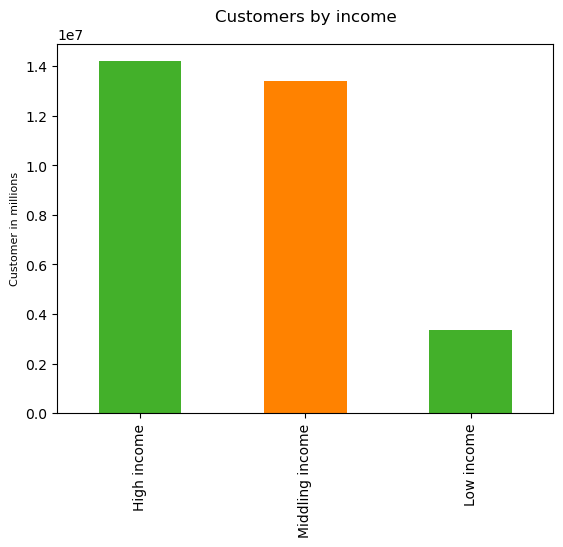

In [43]:
# Creating a bar chart for income_group
bar_income = df_active['income_group'].value_counts().plot.bar(color =['#43b02a', '#ff8200', '#43b02a'])
plt.ylabel('Customer in millions', fontsize = 8)
plt.title('Customers by income', fontsize = 12, pad=16)

Text(0.5, 1.0, 'Customers by number of children')

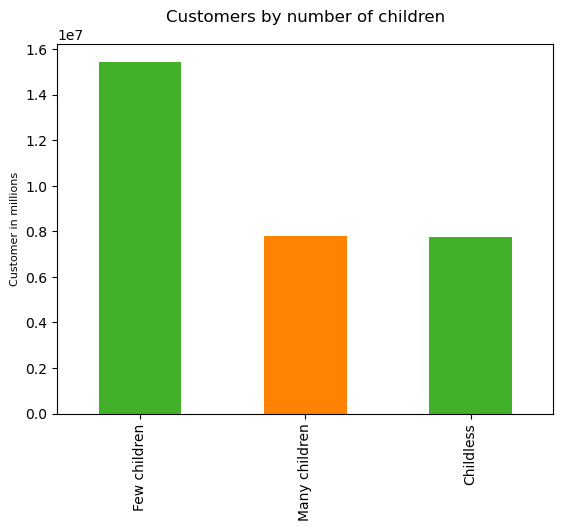

In [44]:
# Creating a bar chart for dependant_group
bar_children = df_active['dependant_group'].value_counts().plot.bar(color =['#43b02a', '#ff8200', '#43b02a'])
plt.ylabel('Customer in millions', fontsize = 8)
plt.title('Customers by number of children', fontsize = 12, pad=16)

Text(0.5, 1.0, 'Household Distribution')

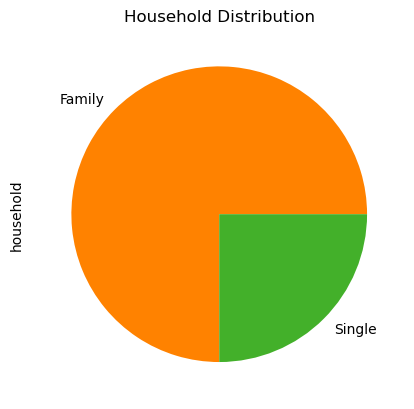

In [45]:
# Creating a pie chart for household
pie_household = df_active['household'].value_counts().plot.pie(labels = ['Family','Single'], colors = ['#ff8200','#43b02a'])
plt.title( "Household Distribution", fontsize= '12')

Text(0.5, 1.0, 'Veganism Distribution')

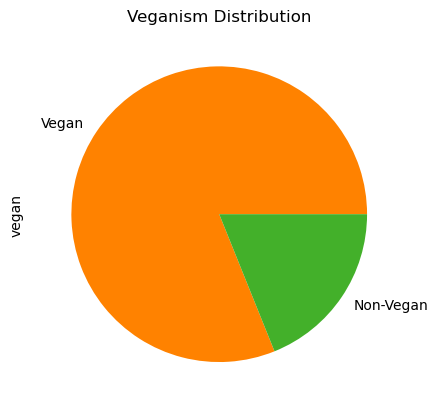

In [46]:
# Creating a pie chart for vegan distribution
pie_vegan = df_active['vegan'].value_counts().plot.pie(labels = ['Vegan','Non-Vegan'], colors = ['#ff8200','#43b02a'])
plt.title( "Veganism Distribution", fontsize= '12')

Text(0.5, 1.0, 'Pet Ownership')

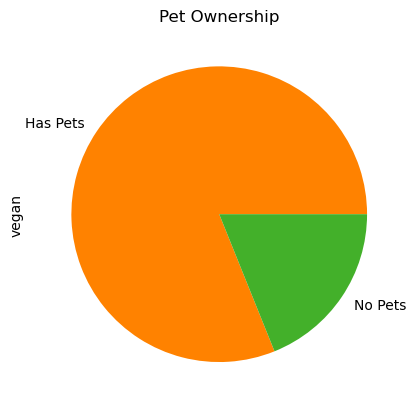

In [47]:
# Creating a pie chart for pet ownership distribution
pie_pets = df_active['vegan'].value_counts().plot.pie(labels = ['Has Pets','No Pets'], colors = ['#ff8200','#43b02a'])
plt.title( "Pet Ownership", fontsize= '12')

Text(0.5, 1.0, 'New parents')

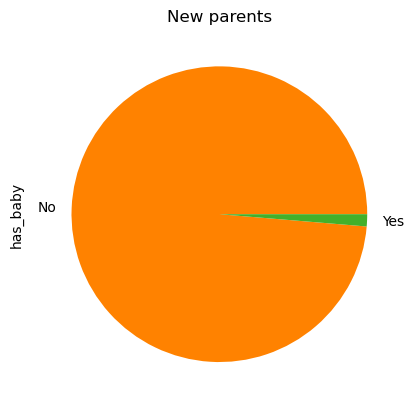

In [63]:
# Creating a pie chart for pet ownership distribution
pie_baby = df_active['has_baby'].value_counts().plot.pie(labels = ['No','Yes'], colors = ['#ff8200','#43b02a'])
plt.title( "New parents", fontsize= '12')

# Step 8

In [49]:
# Aggregating department spending
df_active.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.150699  1.0     15.0
babies            7.634399  1.0     15.0
bakery            7.857482  1.0     15.0
beverages         7.682556  1.0     15.0
breakfast         8.031647  1.0     14.9
bulk              8.346919  1.4     14.1
canned goods      7.546660  1.0     15.0
dairy eggs       33.114599  1.0  99999.0
deli              7.783347  1.0     15.0
dry goods pasta   7.349370  1.0     15.0
frozen            7.733725  1.0     15.0
household         7.379951  1.0     15.0
international     7.678797  1.0     15.0
meat seafood     16.300034  8.0     25.0
missing           8.660655  1.0     15.0
other             6.961995  1.1     15.0
pantry            8.014482  1.0     20.0
personal care     7.998744  1.0     15.0
pets              7.887489  1.0     15.0
produce           7.980348  1.0     15.0
snacks            4.275555  1.6      7.0

In [50]:
# Aggregating age group spending
df_active.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Elderly      11.724449  1.0  99999.0
Middle aged  12.023692  1.0  99999.0
Young        12.082739  1.0  99999.0

In [51]:
# Aggregating income spending
df_active.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_group                            
High income      16.461509  1.0  99999.0
Low income        6.707347  1.0     25.0
Middling income   8.442739  1.0  99999.0

In [52]:
# Aggregating dependant_group spending
df_active.groupby('dependant_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependant_group                         
Childless        12.102657  1.0  99999.0
Few children     11.920187  1.0  99999.0
Many children    11.791609  1.0  99999.0

In [53]:
# Aggregating household spending
df_active.groupby('household').agg({'prices' : ['mean', 'min', 'max']})

prices              
                mean  min      max
household                         
Family     11.877157  1.0  99999.0
Single     12.102657  1.0  99999.0

In [54]:
# Aggregating vegan/non-vegan spending
df_active.groupby('vegan').agg({'prices' : ['mean', 'min', 'max']})

prices              
                mean  min      max
vegan                             
Non-Vegan  31.175737  1.0  99999.0
Vegan       7.449528  1.0     20.0

In [55]:
# Aggregating pet ownership spending
df_active.groupby('pet_owner').agg({'prices' : ['mean', 'min', 'max']})

prices              
                mean  min      max
pet_owner                         
Has Pets    7.887489  1.0     15.0
No Pets    11.945718  1.0  99999.0

In [56]:
# Aggregating new parent spending
df_active.groupby('has_baby').agg({'prices' : ['mean', 'min', 'max']})

prices              
               mean  min      max
has_baby                         
No        11.991265  1.0  99999.0
Yes        7.634399  1.0     15.0

# Step 9

In [57]:
# Creating region_income crosstab
region_income = pd.crosstab(df_active['region'], df_active['income_group'], dropna = False)
region_income

income_group,High income,Low income,Middling income
region,,,
Midwest,3400093,783764,3077656
Northeast,2516484,587137,2361064
South,4663945,1142572,4504622
West,3626880,849081,3451266


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

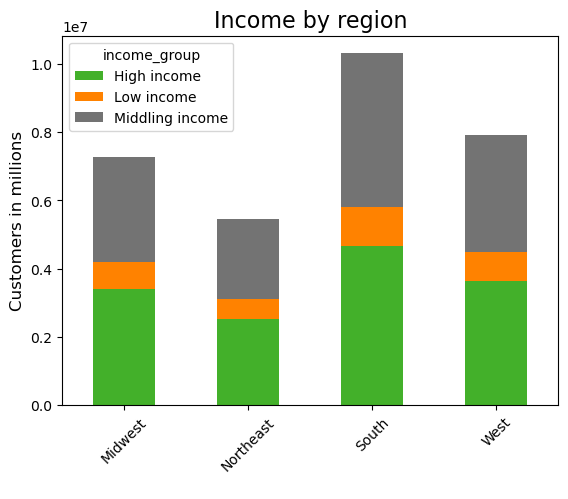

In [58]:
# Creating a stacked region bar chart for income by region
bar_income_region = region_income.plot(kind = 'bar', stacked = True, color =['#43b02a', '#ff8200','#737373'])
plt.title( "Income by region", fontsize= '16')
plt.ylabel('Customers in millions', fontsize = 12)
plt.xlabel(' ',  fontsize = 8)
plt.xticks(rotation=45)

In [59]:
# Creating household_depts crosstab
household_age = pd.crosstab(df_active['department'], df_active['age_group'], dropna = False)
household_age

age_group,Elderly,Middle aged,Young
department,,,
alcohol,47596,66596,30435
babies,138738,187584,84070
bakery,382446,510787,227595
beverages,883669,1168991,519241
breakfast,227751,305464,137635
bulk,11424,15067,6960
canned goods,344447,459383,208244
dairy eggs,1762512,2358394,1056276
deli,343335,456746,203753


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

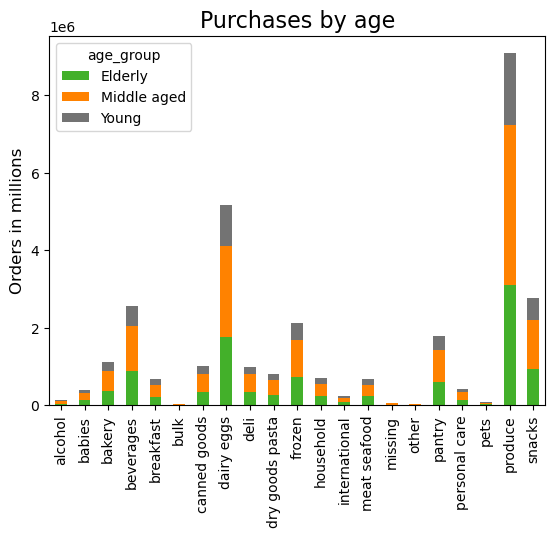

In [60]:
# Creating a stacked region bar chart for department orders by age
bar_household_age = household_age.plot(kind = 'bar', stacked = True, color =['#43b02a', '#ff8200','#737373'])
plt.title( "Purchases by age", fontsize= '16')
plt.ylabel('Orders in millions', fontsize = 12)
plt.xlabel(' ',  fontsize = 8)
plt.xticks(rotation=90)

# Step 9

In [61]:
# Exporting dataframe
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customer.pkl'))

In [64]:
# Exporting charts
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age.png'))
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))
bar_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_children.png'))

pie_household.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_household.png'))
pie_vegan.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_vegan.png'))
pie_pets.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_pets.png'))
pie_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_baby.png'))

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))
bar_household_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_household_age.png'))